<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Multi_String_Search_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi String Search

Write a function that takes in a big string and an array of small strings, all of which are smaller in length than the big string. The function should return an array of booleans, where each boolean represents whether the small string at that index in the array of small strings is contained in the big string.

Note that you can't use language-built-in string-matching methods.

Sample Input #1

```
bigString = "this is a big string"
smallStrings = ["this", "yo", "is", "a", "bigger", "string", "kappa"]
```



Sample Output #1

```
[true, false, true, true, false, true, false]
```



Sample Input #2

```
bigString = "abcdefghijklmnopqrstuvwxyz"
smallStrings = ["abc", "mnopqr", "wyz", "no", "e", "tuuv"]
```



Sample Output #2

```
[true, true, false, true, true, false]
```



# Solution 1 : Naive Solution

In [1]:
# Time O(nbs)
# Space O(n)
# b = len(bigString)
# s = max len(smallString)
# n = # of smallSrings

def multiStringSearch(bigString, smallStrings):
	return [is_in_bigstring(bigString, smallstring) for smallstring in smallStrings]

def is_in_bigstring(bigString, smallstring):
	for i in range(len(bigString)):
		if i + len(smallstring) > len(bigString):
			break
		if is_in_bigstring_helper(bigString, smallstring, i):
			return True
	return False

def is_in_bigstring_helper(bigString, smallstring, start_idx):
	big_idx = start_idx
	small_idx = 0
	while small_idx <= len(smallstring) - 1:
		if smallstring[small_idx] != bigString[big_idx]:
			return False
		big_idx += 1
		small_idx += 1
	return True
	

## Conceptual Note

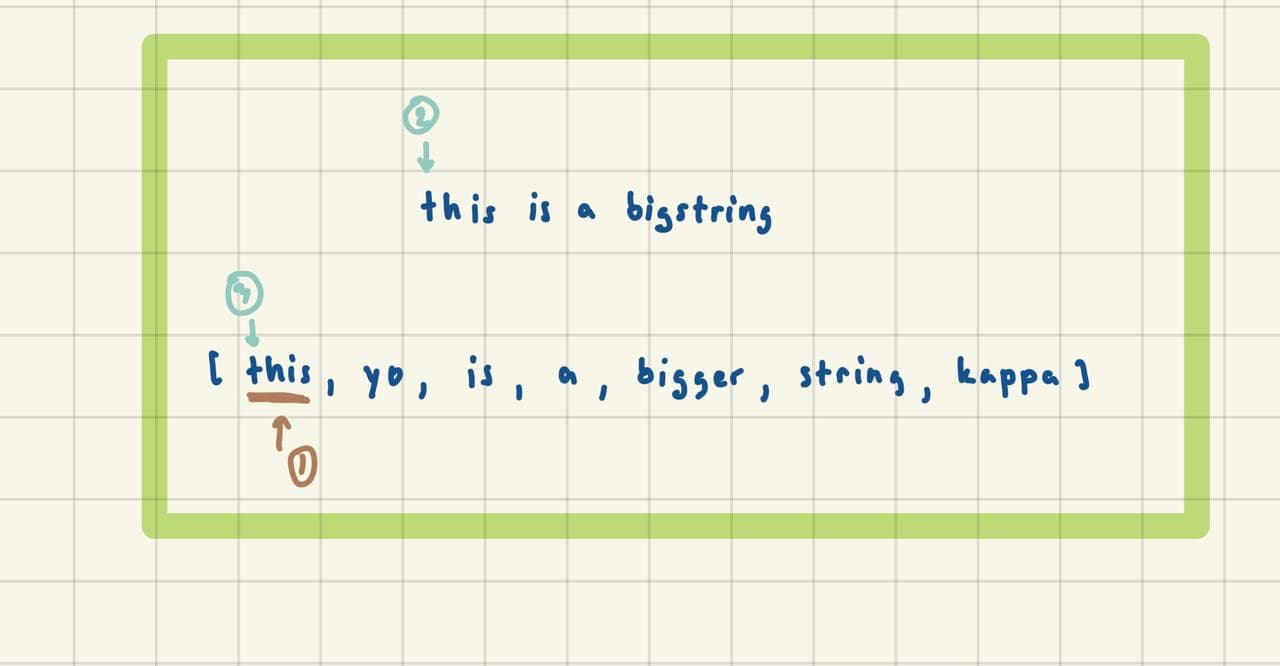

# Solution 2 : build suffix trie from big string

In [2]:
# Time O(b^2 + ns)
# Space O(b^2 + n)
# b = len(bigString)
# s = max len(smallString)
# n = # of smallSrings

def multiStringSearch(bigString, smallStrings):
  suffix_trie = modified_suffix_trie(bigString)
  return [suffix_trie.is_contain(smallstring) for smallstring in smallStrings]

class modified_suffix_trie:
  def __init__(self, string):
    self.root = {}
    self.build_suffix_trie(string)

  def build_suffix_trie(self, string):
    for i in range(len(string)):
      node = self.root
      for j in range(i, len(string)):
        letter = string[j]
        if letter not in node:
          node[letter] = {}
        node = node[letter]

  def is_contain(self, string):
    node = self.root
    for letter in string:
      if letter not in node:
        return False
      node = node[letter]
    return True
    

In [3]:
bigString = "this is a big string"
smallStrings = ["this", "yo", "is", "a", "bigger", "string", "kappa"]
multiStringSearch(bigString, smallStrings)

[True, False, True, True, False, True, False]

## Conceptual Note

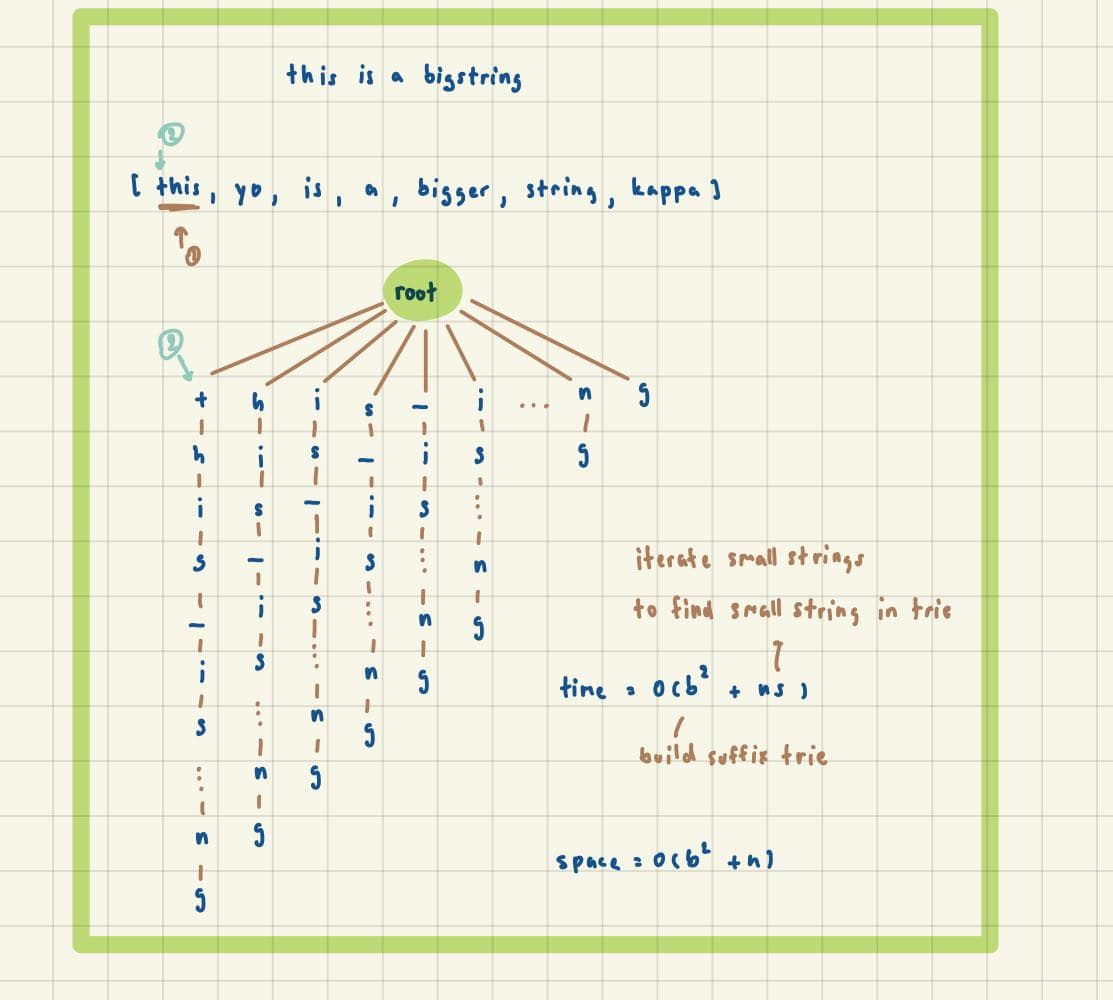

# Solution 3 : build trie from small string

In [4]:
# time = O(ns + bs)
# space = O(n)
# b = len(bigString)
# s = max len(smallString)
# n = # of smallSrings

def multiStringSearch(bigString, smallStrings):
  smallStrings_trie = trie()
  for idx in range(len(smallStrings)):
    smallStrings_trie.insert(smallStrings[idx], idx)
  containedStrings = [False for _ in range(len(smallStrings))]
  for i in range(len(bigString)):
    find_small_strins(bigString, i, smallStrings_trie, containedStrings)
  return containedStrings

def find_small_strins(string, start_idx, trie, containedStrings):
  current_node = trie.root
  for i in range(start_idx, len(string)):
    char = string[i]
    if char not in current_node:
      break
    current_node = current_node[char]
    if trie.endsymbol in current_node:
      containedStrings[current_node[trie.endsymbol]] = True

class trie:
  def __init__(self):
    self.root = {}
    self.endsymbol = "*"

  def insert(self, string, idx):
    node = self.root
    for i in range(len(string)):
      if string[i] not in node:
        node[string[i]] = {}
      node = node[string[i]]
    node[self.endsymbol] = idx

In [5]:
bigString = "this is a big string"
smallStrings = ["this", "yo", "is", "a", "bigger", "string", "kappa"]
multiStringSearch(bigString, smallStrings)

[True, False, True, True, False, True, False]

## Conceptual Note

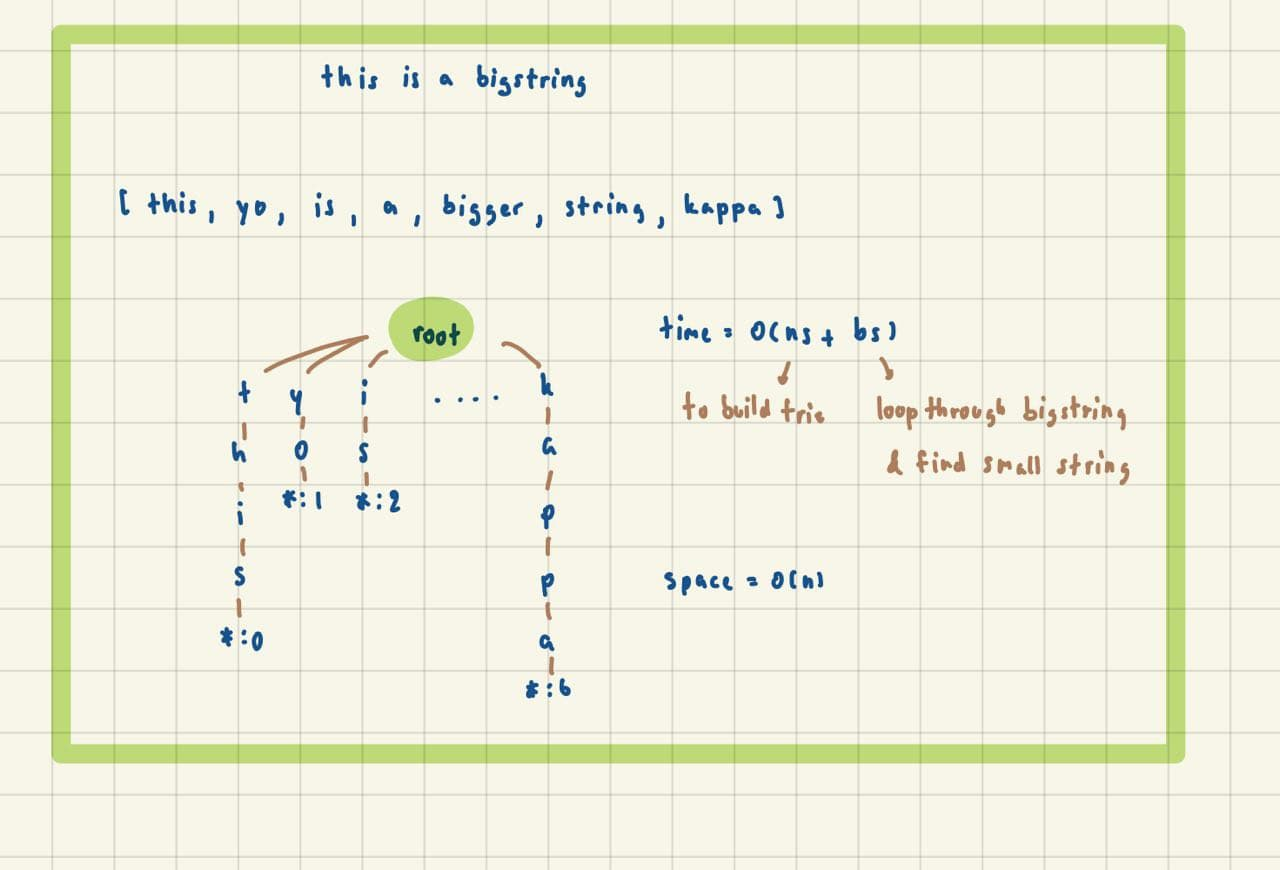

# Solution 4 : modified solution 2

- modified solution 2 to limit length in suffix trie

In [6]:
# Time O(bs + ns)
# Space O(bs + n)
# b = len(bigString)
# s = max len(smallString)
# n = # of smallSrings

def multiStringSearch(bigString, smallStrings):
  max_length = find_max_lenth(smallStrings)
  suffix_trie = modified_suffix_trie(bigString, max_length)
  return [suffix_trie.is_contain(smallstring) for smallstring in smallStrings]

def find_max_lenth(Strings):
  max_length = 0
  for string in Strings:
    max_length = max(max_length, len(string))
  return max_length

class modified_suffix_trie:
  def __init__(self, string, max_length = float('inf')):
    self.root = {}
    self.build_suffix_trie(string, max_length)

  def build_suffix_trie(self, string, max_length = float('inf')):
    for i in range(len(string)):
      node = self.root
      for j in range(i, len(string)):
        letter = string[j]
        if letter not in node:
          node[letter] = {}
        node = node[letter]
        if j - i == max_length - 1:
          break

  def is_contain(self, string):
    node = self.root
    for letter in string:
      if letter not in node:
        return False
      node = node[letter]
    return True

In [7]:
bigString = "this is a big string"
smallStrings = ["this", "yo", "is", "a", "bigger", "string", "kappa"]
multiStringSearch(bigString, smallStrings)

[True, False, True, True, False, True, False]

In [8]:
bigString = "bbbabb"
smallStrings = ["bbabb"]
multiStringSearch(bigString, smallStrings)

[True]

## Conceptual Note

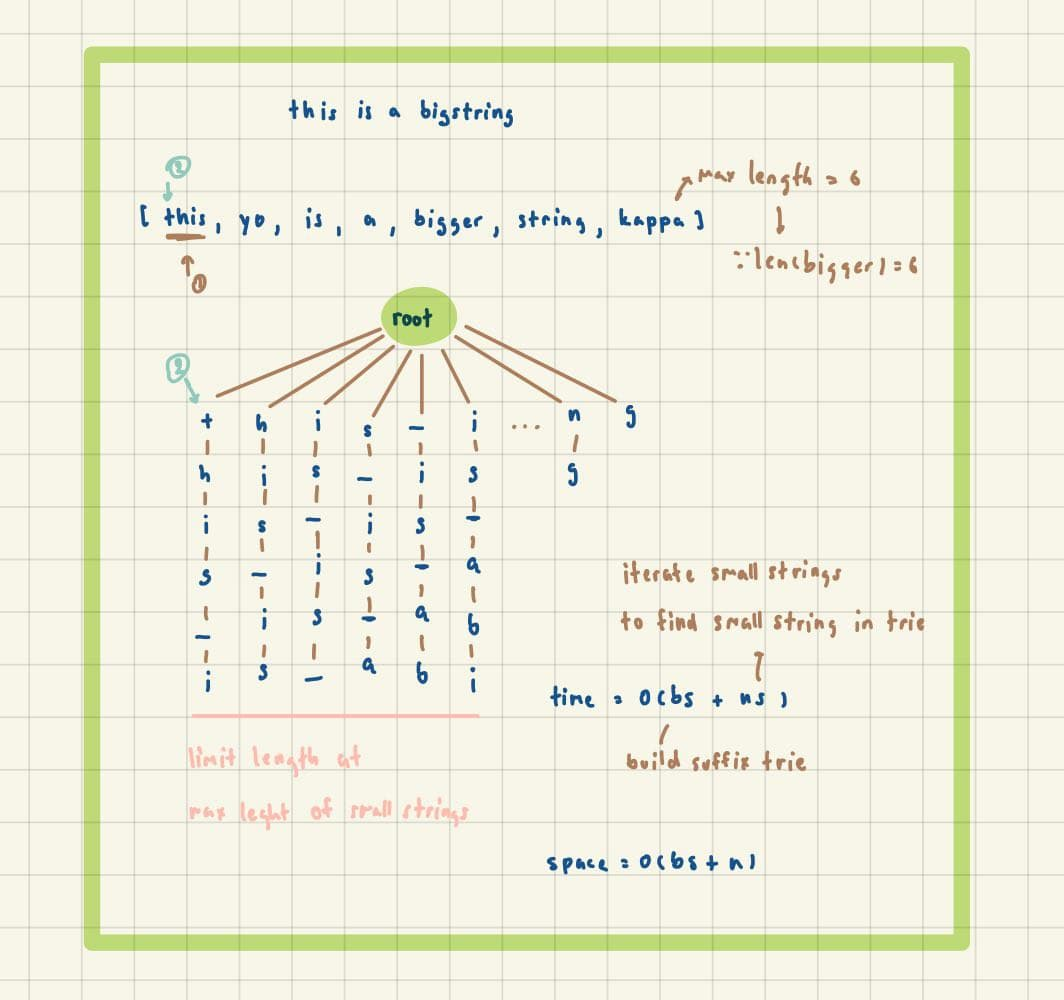